In [16]:
import csv
import matplotlib.pyplot as plt

def plot_gpgga_scatter(filename: str):
    x_vals = []
    y_vals = []

    # CSV 파일 읽기 (CP949 인코딩 + 디코딩 오류 무시)
    with open(filename, newline='', encoding='cp949', errors='ignore') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            # 열 개수가 충분하고, 2번째 열이 "GPS_GS:$GPGGA"인 경우에만 처리
            if len(row) > 5 and row[1].strip() == "GPS_GS : $GPGGA":
                try:
                    x = float(row[5])
                    y = float(row[3])
                    x_vals.append(x)
                    y_vals.append(y)
                except ValueError:
                    # 숫자로 변환할 수 없는 경우는 건너뜀
                    continue

    # 산점도 그리기
    plt.figure(figsize=(8, 6))
    plt.scatter(x_vals, y_vals, s=10)
    plt.xlabel('Lat')
    plt.ylabel('Lon')
    plt.title('GPS_GS:$GPGGA')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

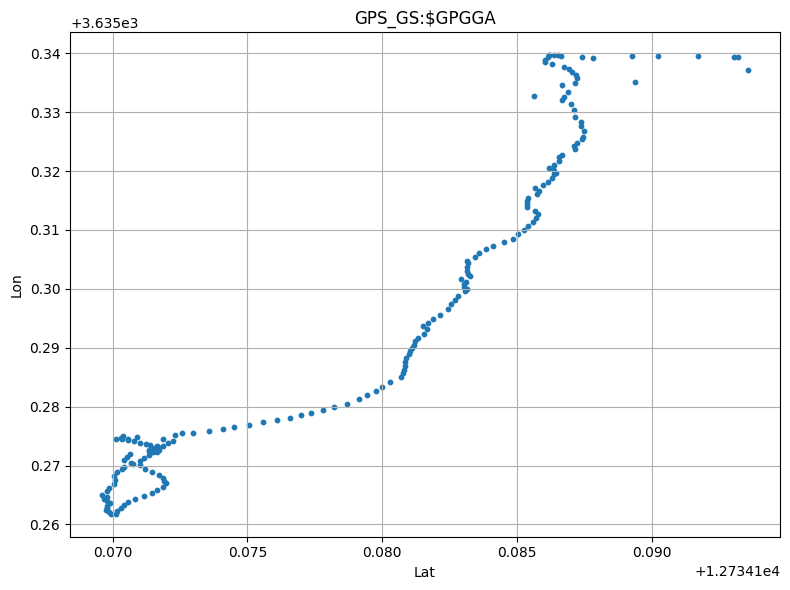

In [17]:
plot_gpgga_scatter('GPSLog_250801.csv')
